*HI THIS IS THE PRESENTATION OF FOURIER TRANSFORM*

In [43]:
`

In [65]:
def minFreqEstErr(inputFile,f):
    fs,x = UF.wavread(inputFile)
    prevN = 0
    mindiff = 1000
    minLoc = 0
    minN = 1
    minM = 0
    for i in range(0,int(np.log10(len(x))/np.log10(2))):
        for j in range(101,int(np.power(2,i)),100):
            print(j)
            if(fs/2-j//2<0):
                x_dash = x[0:int(fs/2+j//2+1)]
            if(fs/2+j//2>len(x)):
                x_dash = x[int(fs/2-j//2):len(x)]
            if(fs/2+j//2>len(x) and fs/2-j//2<0):
                x_dash = x[0:len(x)]
            else:
                x_dash = x[int(fs/2-j//2):int(fs/2+j//2+1)]
            w = get_window('blackman',j)
            mX,pX = DFT.dftAnal(x_dash,w,int(np.power(2,i)))
            ploc = UF.peakDetection(mX,-40)
            iploc,_,_ = UF.peakInterp(mX,pX,ploc)
            if(np.abs(f-fs*iploc/np.power(2,i))<mindiff):
                mindiff = np.abs(f-fs*iploc/np.power(2,i))
                minN = np.power(2,i)
                minM = j
                minLoc = fs*iploc/minN
            if(mindiff<0.05):
                break
    return minLoc,minN,minM


In [68]:
loc,N,M = minFreqEstErr('C:/Users/k2vas/OneDrive/Documents/firstYear/EE220/sms-tools-master/sounds/sine-200.wav',200)
print(loc,N,M)

101
101
201
101
201
301
401
501
101
201
301
401
501
601
701
801
901
1001
101
201
301
401
501
601
101
101
101
[200.00578431] 2048 601


In [26]:
fs,x = UF.wavread('C:/Users/k2vas/OneDrive/Documents/firstYear/EE220/sms-tools-master/sounds/sine-1000.wav')
w = get_window('blackman',128)
mX,pX = DFT.dftAnal(x,w,1024)
plt.plot(mX)

ValueError: operands could not be broadcast together with shapes (88200,) (128,) 

In [16]:
from scipy.signal import get_window
from scipy.fftpack import fft,ifft,fftshift
import sys
import matplotlib.pyplot as plt

sys.path.append( 'C:/Users/k2vas/OneDrive/Documents/firstYear/EE220/sms-tools-master/software/models/')
import stft
import utilFunctions as UF

In [11]:
def computeEngEnv(inputFile,window,M,N,H):
    w = get_window(window,M)
    fs,x = UF.wavread(inputFile)
    lowFreqBoundK = 3000*N/fs
    highFreqBoundK = 10000*N/fs
    engEnv = np.zeros((X_dash.shape[0],2))
    mX,pX = stft.stftAnal(x,w,N,H)
    
    return mX,pX

In [12]:
mX,pX = computeEngEnv('C:\\Users\\k2vas\\OneDrive\\Documents\\firstYear\\EE220\\sms-tools-master\\sounds\\piano.wav','blackman',513,1024,128)

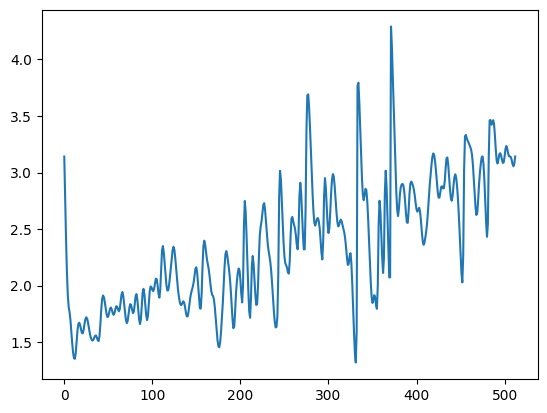

In [20]:
import os
import sys
import numpy as np
import math
from scipy.signal import get_window
import matplotlib.pyplot as plt

sys.path.append( 'C:/Users/k2vas/OneDrive/Documents/firstYear/EE220/sms-tools-master/software/models/')
import utilFunctions as UF
import dftModel as DFT
eps = np.finfo(float).eps

def minFreqEstErr(inputFile,f):
    fs,x = UF.wavread(inputFile)
    prevN = 0
    mindiff = 1000
    minLoc = 0
    minN = 1
    minM = 0
    for i in range(0,int(np.log10(len(x))/np.log10(2))):
        for j in range(101,int(np.power(2,i)),100):
            if(fs/2-j//2<0):
                x_dash = x[0:int(fs/2+j//2+1)]
            if(fs/2+j//2>len(x)):
                x_dash = x[int(fs/2-j//2):len(x)]
            if(fs/2+j//2>len(x) and fs/2-j//2<0):
                x_dash = x[0:len(x)]
            else:
                x_dash = x[int(fs/2-j//2):int(fs/2+j//2+1)]
            w = get_window('blackman',j)
            mX,pX = DFT.dftAnal(x_dash,w,int(np.power(2,i)))
            ploc = UF.peakDetection(mX,-40)
            iploc,_,_ = UF.peakInterp(mX,pX,ploc)
            if(np.abs(f-fs*iploc/np.power(2,i))<mindiff):
                mindiff = np.abs(f-fs*iploc/np.power(2,i))
                minN = np.power(2,i)
                minM = j
                minLoc = fs*iploc/minN
        if(mindiff<0.05):
                break
            
    return (minLoc[0],minN,minM)


In [23]:
(minLoc,minN,minM) = minFreqEstErr('C:/Users/k2vas/OneDrive/Documents/firstYear/EE220/sms-tools-master/sounds/sine-490.wav',490)


In [24]:
minLoc,minN,minM


(489.9957344320959, 1024, 201)